# Opening an Image

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Gorsel yukleme
image_file = 'Gorseller/Gorsel2.jpg'
img = cv2.imread(image_file)

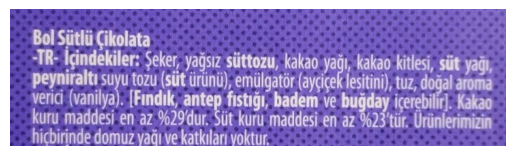

In [3]:
# Goruntu ciktisi aliyoruz
'''
cv2.imshow('Original Image', img)
cv2.waitKey(0)
'''
# ekstra pencere acmamasi icin plt olarak cikti aldim
plt.imshow(img)
plt.axis('off') 
plt.show()

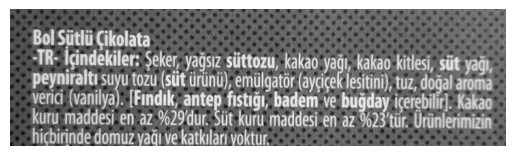

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Siyah beyaz görüntüyü göster
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()

# Inverted Image

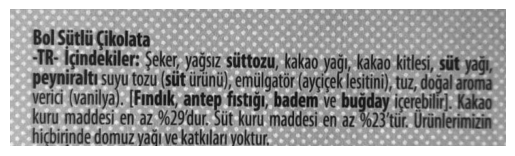

In [6]:
# ters goruntu alma
inverted_image = cv2.bitwise_not(img_gray)
plt.imshow(inverted_image, cmap='gray')
plt.axis('off')  
plt.show()

# Binarization

In [8]:
# otomatik cevirme icin
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
gray_image = grayscale(img)
cv2.imwrite('Gorseller/Gorsel1.jpg', gray_image)

True

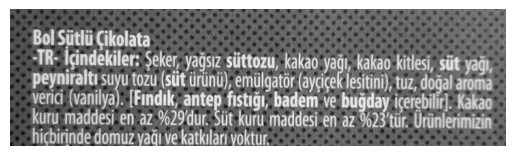

In [10]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  
plt.show()

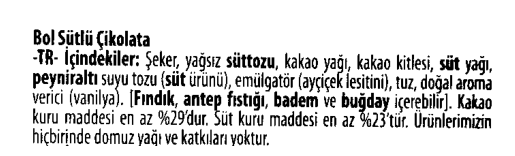

In [11]:
# treshold ile bitwise hale getirme
# burada amac goruntuyu sgri halden alip siyah ve beyaz yapmak. threshold 160 alti degerleri beyaza digerlerini siyaha yuvarladi gibi dusun
# burada daha iyi verdigi icin gorseli inverted imagei aldim
thersh, im_bw = cv2.threshold(inverted_image, 80, 200, cv2.THRESH_BINARY)
plt.imshow(im_bw, cmap='gray')
plt.axis('off')  
plt.show()

# NOISE REMOVEL

In [13]:
# gurultu giderecegiz
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

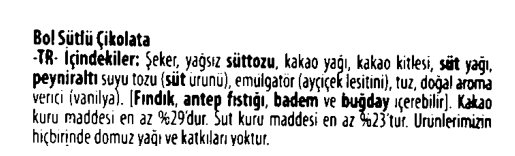

In [14]:
no_noise = noise_removal(im_bw)
plt.imshow(no_noise, cmap='gray')
plt.axis('off')  
plt.show()

# Dilation and Erison

In [16]:
# fontu inceltelim
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

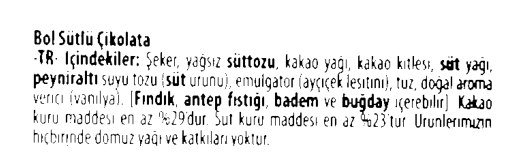

In [17]:
eroded_image = thin_font(no_noise)
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')  
plt.show()

In [18]:
# kalin font
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

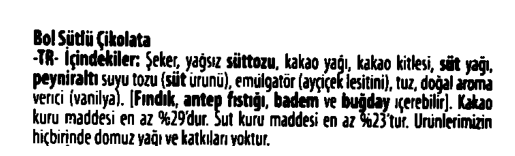

In [19]:
dilate_image = thick_font(no_noise)
plt.imshow(dilate_image, cmap='gray')
plt.axis('off')  
plt.show()

In [20]:
# OCR deneyelim burada
import easyocr

In [21]:
reader = easyocr.Reader(['tr'])  #Türkçe metinler için

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [22]:
results1 = reader.readtext(dilate_image)
results2 = reader.readtext(eroded_image)
results3 = reader.readtext(im_bw)

# dilate_image

Metin: Bol Südü Çikolata, Güven: %53.14
Metin: tozu (süturunü), emuilgatör , Güven: %45.22
Metin: verıci, Güven: %96.62
Metin: [Fındık;, Güven: %53.18
Metin: hstigu badam ve, Güven: %41.60
Metin: Urunlerimizin, Güven: %61.96
Metin: hicbirinde domuz vağı ve katkıları voktur, Güven: %60.18


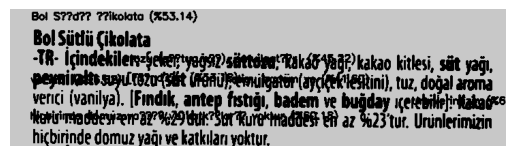

In [24]:
# dilate_image

# Tespit edilen metinleri ve güveni yazdırma
for (_, text, confidence) in results1:
    # Güven %40'ın altında ise yazdırma
    if confidence < 0.40:
        continue
    print(f"Metin: {text}, Güven: %{confidence * 100:.2f}")

# Görüntü üzerinde tespit edilen metinleri işaretleme
for (bbox, text, confidence) in results1:
    # Güven %40'ın altında ise metni atla
    if confidence < 0.40:
        continue
    
    # Koordinatları kullanmadan sadece metin ve güven ekliyoruz
    (top_left, _, _, _) = bbox
    top_left = tuple(map(int, top_left))

    # Görüntüde metin bilgisini yaz
    cv2.putText(dilate_image, f"{text} (%{confidence * 100:.2f})", (top_left[0], top_left[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Sonucu göster
plt.imshow(cv2.cvtColor(dilate_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# eroded_image

Metin: Bol Sütlü Çitolata, Güven: %42.41
Metin: peyniraltı suyu tozu {sut urunu) emulgator, Güven: %84.22
Metin: Iesıtını), tuz, dogal aoma, Güven: %50.95
Metin: Katao, Güven: %59.63
Metin: kuru maddesı en az "29dur. Sut kuru maddesı en, Güven: %55.79


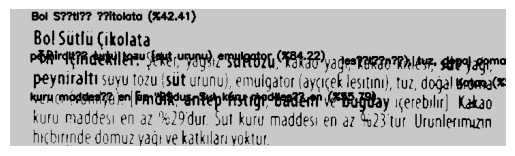

In [26]:
# eroded_image
for (_, text, confidence) in results2:
    # Güven %40'ın altında ise yazdırma
    if confidence < 0.40:
        continue
    print(f"Metin: {text}, Güven: %{confidence * 100:.2f}")

# Görüntü üzerinde tespit edilen metinleri işaretleme
for (bbox, text, confidence) in results2:
    # Güven %40'ın altında ise metni atla
    if confidence < 0.40:
        continue
    
    # Koordinatları kullanmadan sadece metin ve güven ekliyoruz
    (top_left, _, _, _) = bbox
    top_left = tuple(map(int, top_left))

    # Görüntüde metin bilgisini yaz
    cv2.putText(eroded_image, f"{text} (%{confidence * 100:.2f})", (top_left[0], top_left[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Sonucu göster
plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# im_bw

Metin: Bol Sütlü Çikolata, Güven: %89.20
Metin: TR: Içindekiler: Şeker yağsız süttozu; kakao, Güven: %50.22
Metin: kakao kitlesi; süt yağı, Güven: %82.84
Metin: peyniraltı suyu tozu (sit urunü), emülgatör, Güven: %50.03
Metin: tuz, doğal aroma, Güven: %43.69
Metin: verici (vanilya) . [Fındık; antep_fıstığı; badem ve, Güven: %51.71
Metin: iserebilir] . Kakao, Güven: %56.58
Metin: kuru maddesi en az %29dur;, Süt kuru maddesi en, Güven: %74.45
Metin: dz, Güven: %40.35
Metin: 'tür. Urünlerimizin, Güven: %48.12
Metin: hicbirinde domuz vağı ve katkıları voktur., Güven: %56.73


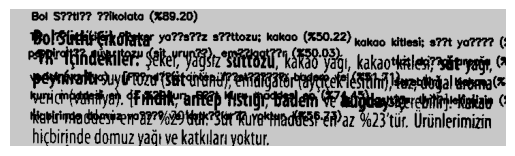

In [28]:
# im_bw
for (_, text, confidence) in results3:
    # Güven %40'ın altında ise metni atla
    if confidence < 0.40:
        continue
    print(f"Metin: {text}, Güven: %{confidence * 100:.2f}")

# Görüntü üzerinde tespit edilen metinleri işaretleme
for (bbox, text, confidence) in results3:
    # Güven %40'ın altında ise metni atla
    if confidence < 0.40:
        continue
    
    # Koordinatları kullanmadan sadece metin ve güven ekliyoruz
    (top_left, _, _, _) = bbox
    top_left = tuple(map(int, top_left))

    # Görüntüde metin bilgisini yaz
    cv2.putText(im_bw, f"{text} (%{confidence * 100:.2f})", (top_left[0], top_left[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Sonucu göster
plt.imshow(cv2.cvtColor(im_bw, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Görüntü 1 Ortalama Güven: %35.13
Görüntü 2 Ortalama Güven: %35.23
Görüntü 3 Ortalama Güven: %50.78


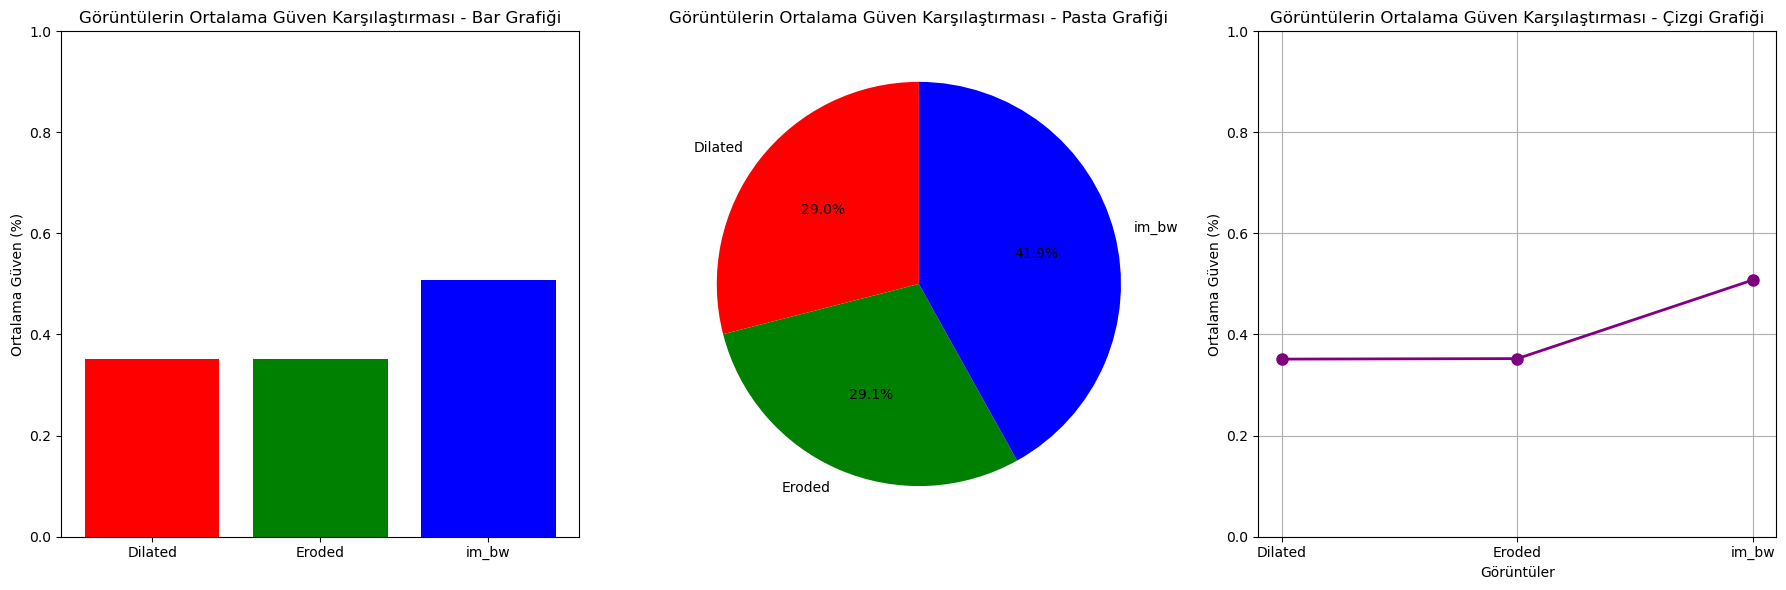

In [29]:
# Ortalama güven oranlarını hesapla
confidences1 = [confidence for (_, _, confidence) in results1]
confidences2 = [confidence for (_, _, confidence) in results2]
confidences3 = [confidence for (_, _, confidence) in results3]

# Ortalama güven oranını hesapla
avg_confidence1 = sum(confidences1) / len(confidences1) if confidences1 else 0
avg_confidence2 = sum(confidences2) / len(confidences2) if confidences2 else 0
avg_confidence3 = sum(confidences3) / len(confidences3) if confidences3 else 0

# Sonuçları yazdır
print(f"Görüntü 1 Ortalama Güven: %{avg_confidence1 * 100:.2f}")
print(f"Görüntü 2 Ortalama Güven: %{avg_confidence2 * 100:.2f}")
print(f"Görüntü 3 Ortalama Güven: %{avg_confidence3 * 100:.2f}")

# Grafikler için etiketler ve veriler
labels = ['Dilated', 'Eroded', 'im_bw']
avg_confidences = [avg_confidence1, avg_confidence2, avg_confidence3]

# Grafikler için subplotları tanımla (yan yana 3 grafik)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Bar Grafiği
axes[0].bar(labels, avg_confidences, color=['red', 'green', 'blue'])
axes[0].set_ylabel('Ortalama Güven (%)')
axes[0].set_title('Görüntülerin Ortalama Güven Karşılaştırması - Bar Grafiği')
axes[0].set_ylim(0, 1)

# 2. Pasta Grafiği
axes[1].pie(avg_confidences, labels=labels, autopct='%1.1f%%', colors=['red', 'green', 'blue'], startangle=90)
axes[1].set_title('Görüntülerin Ortalama Güven Karşılaştırması - Pasta Grafiği')

# 3. Çizgi Grafiği
axes[2].plot(labels, avg_confidences, marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
axes[2].set_xlabel('Görüntüler')
axes[2].set_ylabel('Ortalama Güven (%)')
axes[2].set_title('Görüntülerin Ortalama Güven Karşılaştırması - Çizgi Grafiği')
axes[2].set_ylim(0, 1)
axes[2].grid(True)

# Grafikleri göster
plt.tight_layout()
plt.show()